#  Customer Attrition and Relationship Analysis

## Lets start import the libraries that will use in this project. 

* Pandas will be used the create a dataframe.
* Numpy will be used for the arithmetic calculations if it is necessary
* Plotly and seaborn libraries will be used for the visualization.
* Math and matplotlib also will be used in this analysis

## Features description

* CLIENTNUM : Unique client identifier.
* Attrition_Flag : Indicates whether the customer's account is active or has churned.
* Customer_Age : Age of the customer.
* Gender : Gender of the customer.
* Dependent_count : Number of dependents of the customer.
* Education_Level : Educational level of the customer.
* Marital_Status : Marital status of the customer.
* Income_Category : Income category of the customer.
* Card_Category : Category of the credit card held by the customer.
* Months_on_book : Number of months the customer has been a bank client.
* Total_Relationship_Count : Total number of bank products held by the customer.
* Months_Inactive_12_mon : Number of months with inactivity in the last 12 months.
* Contacts_Count_12_mon : Number of contacts with the bank in the last 12 months.
* Credit_Limit : Credit limit on the credit card.
* Total_Revolving_Bal : Total revolving balance on the credit card.
* Avg_Open_To_Buy : Average open to buy credit line on the credit card.
* Total_Amt_Chng_Q4_Q1 : Change in transaction amount over the last four quarters.
* Total_Trans_Amt : Total transaction amount in the last 12 months.
* Total_Trans_Ct : Total transaction count in the last 12 months.
* Total_Ct_Chng_Q4_Q1 : Change in transaction count over the last four quarters.
* Avg_Utilization_Ratio : Average utilization ratio of the credit card.

In [3]:
#Library
import pandas as pd
import numpy as np
import warnings as wr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
wr.filterwarnings('ignore')

#  **1.Describing of Data**

In [4]:
# Importing CSV or excel or Json
df = pd.read_csv("C:/Users/lohithlikith/Documents/Datasets/Credit card churn/BankChurners.csv")

In [5]:
# Presenting the data with the head function to call top 5 fives in the dataset
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

 ## 2.Understanding the Data

In [6]:
# understanding the dataset

print("The no of columns are present in the data : " , df.shape[1]) 
print("The no of rows are present in the data : ", df.shape[0])

The no of columns are present in the data :  21
The no of rows are present in the data :  10127


### About the data
* Data has 10127 rows and 23 columns;
* There is 0 NaN value in the data;
* There are 7 columns in the float type, 10 columns in the integer type, and 6 columns in the string type

In [7]:
# Getting the column names

column_names = df.columns.tolist()
print(column_names)

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [8]:
# Datatypes
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [9]:
df.dtypes[df.dtypes.values == 'object']

Attrition_Flag     object
Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [10]:
#find unique values for each columns
for col in df:
    uniq = df[col].value_counts()
    print(uniq, '\n==============\n')

768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Customer_Age, dtype: int64 

F    5358
M    4769
Name: Gender, dtype: int64 

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64 

Graduate         3128
High School      2013
Unknown          1519
U

# EDA & Visualization

## Unnecessary Feature Removal
Before processing further, we need to remove features that cannot be used on modelling. The CLIENTNUM feature contains unique ID for every customer so it can not be used as Predictor (input) for the Target (output), and should be dropped

In [11]:
# slice the DataFrame, excluding CLIENTNUM column at index 0, and reassign to 'df'
df = df.iloc[:,1:]

# see the updated df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Now that we have all relevant features, each with their correct data type, let's define which features are numerical and categorical and assign each to a variable.

In [12]:
# Classify column names based on dtypes

object_column_names = df.dtypes[df.dtypes.values == 'object'].index.tolist()
dff=print(object_column_names)

numerical_column_names = df.dtypes[df.dtypes.values != 'object'].index.tolist()
numerical_column_names

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [13]:
for i in object_column_names:
    print(i + ' :')
    print(df[i].value_counts())
    print('--------------------------------------------------------')

Attrition_Flag :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------------
Gender :
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------------
Education_Level :
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------------
Marital_Status :
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------------
Income_Category :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------------
Card_Category :
Blue        9436
Si

##  4.Missing Value Check(or Null Value Treatment)
Make Sure that the data has no missing value

In [14]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [15]:
df.duplicated().sum()

0

## 5.Visualization

### Graph 1 : Histogram

In [16]:
#1)
fig = px.histogram(df, x='Attrition_Flag', color='Income_Category')
fig.show()

In [17]:
#Inference: The income category with the highest number of existing customers is the category with income between $40,000 and $80,000.

In [18]:
#2)
fig = px.histogram(df, x='Attrition_Flag', color='Card_Category')
fig.show()

In [19]:
#Inference : The chart shows the number of customers by card category and attrition flag, where it can be seen that there are more existing customers with blue cards than any other category.

### Graph 2: sunburst

In [20]:
#3)
fig = px.sunburst(df, path=['Marital_Status', 'Card_Category','Income_Category'], 
                  title='Pie Plot of Marital Status,Income Category,Card Category')
fig.show()

In [21]:
#Inference: The pie chart shows the distribution of income by income category, with the blue slices representing the lower income categories and the red slices representing the higher income categories.

### Graph 3 : Lineplot

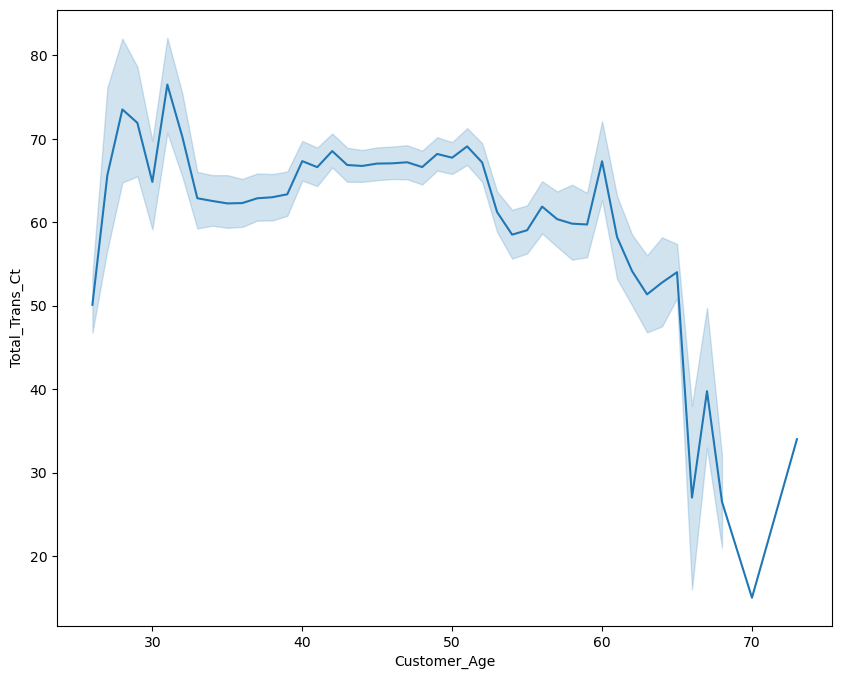

In [22]:
#4)
plt.figure(figsize=(10,8))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Total_Trans_Ct')
plt.show()

In [23]:
#Inference : The line graph shows that the number of transactions made by customers is highest between the ages of 25 and 35.

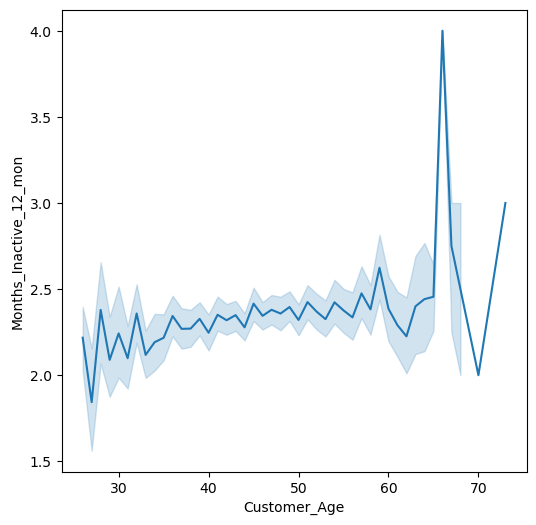

In [24]:
#5)
plt.figure(figsize=(6,6))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Months_Inactive_12_mon')
plt.show()

In [25]:
#Inference: The line plot shows that the number of inactive customers increases with customer age.

In [26]:
#6)
plt.figure(figsize=(6,6))
sns.lineplot(data = df, x = 'Customer_Age', y = 'Credit_Limit')
plt.show()

In [27]:
#Inference : The average credit limit is increasing over time, with customers between 40 and 50 years old having the highest credit limits.

### Graph 4 : Distribution Plot

Text(0.5, 1.0, 'Customers Age distribution')

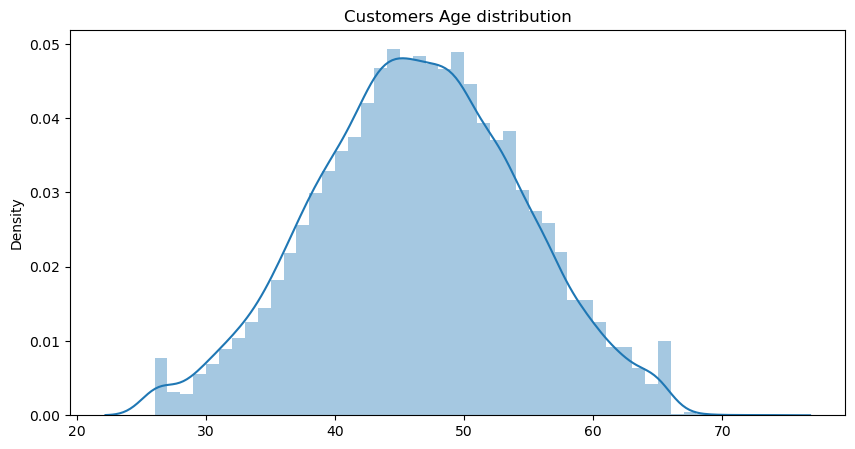

In [28]:
#7)
plt.figure(figsize=(10, 5))
sns.distplot(x=df['Customer_Age'], kde=True)
plt.title("Customers Age distribution")

In [29]:
#Inference : The customer age is even distributed,almost no outlier. And we can see that average and median age of customers in the bank is 46. 
#The above chart also shows that a large number of our customers are between 40 and 50 years old.

### Graph 5 : Countplot

In [30]:
#8)
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Marital_Status'], order=df['Marital_Status'].value_counts().
             sort_values(ascending= False).index)
plt.title('Customers marital status')

Text(0.5, 1.0, 'Customers marital status')

In [31]:
#Inference: Well, following that more of our customers are in their adulthood age, we expect a larger number to be married.

Text(0.5, 1.0, "Customer's educational levels")

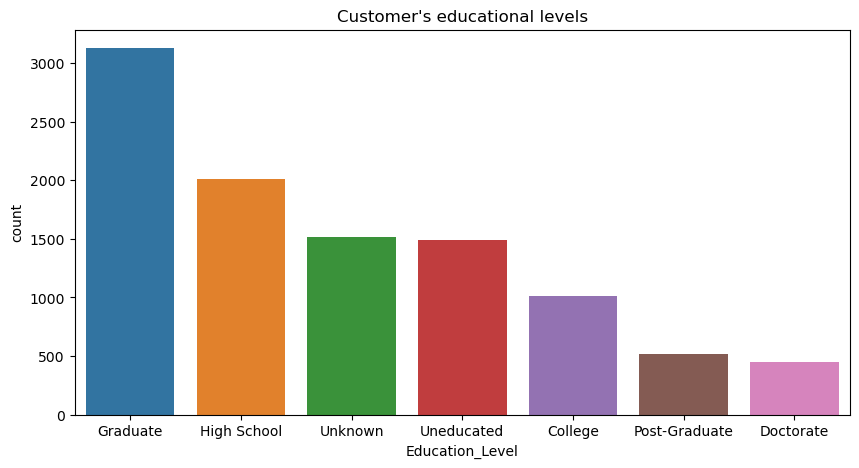

In [32]:
#9)
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Education_Level'], order=df['Education_Level'].value_counts().
              sort_values(ascending= False).index)
plt.title("Customer's educational levels")

In [33]:
#Inference : A large number of the blue card holders are graduates and high school folks, this is very interesting to know.

Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

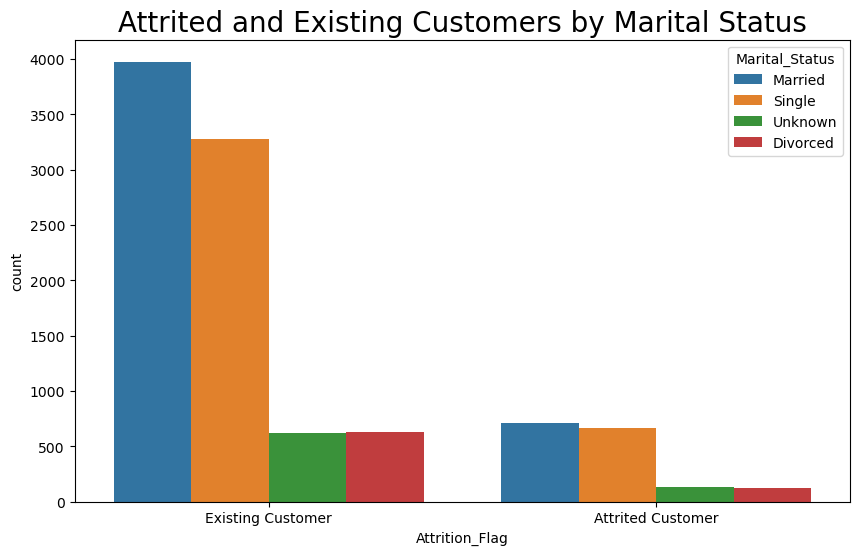

In [34]:
# 10)
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=df)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)

In [35]:
#Inference: A high proportion of marital status in attrited customer is Married status (43.6%), followed by Single (41.1%)

Text(0.5, 1.0, "Customer's Card Category")

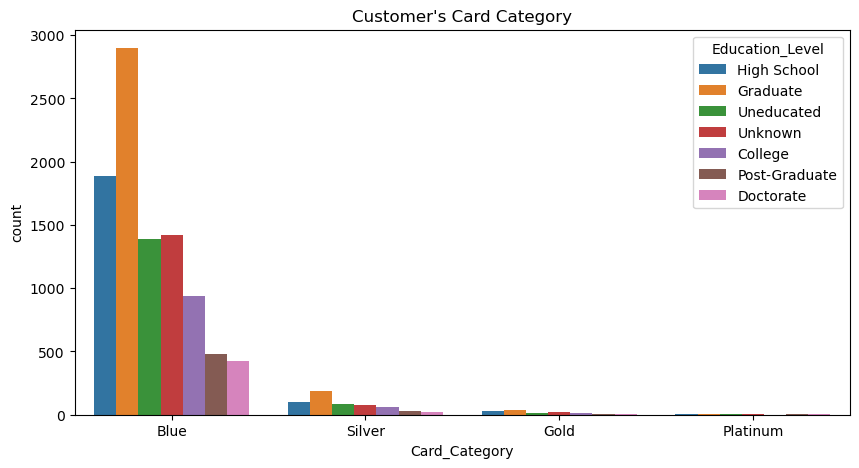

In [36]:
#11)
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Card_Category'], hue=df['Education_Level'], order=df['Card_Category'].value_counts().
              sort_values(ascending= False).index)
plt.title("Customer's Card Category")

In [37]:
#Inference: There are more customers with higher education levels who have credit cards (Gold, Platinum) compared to those with lower education levels.

### Graph 6 : Histplot

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

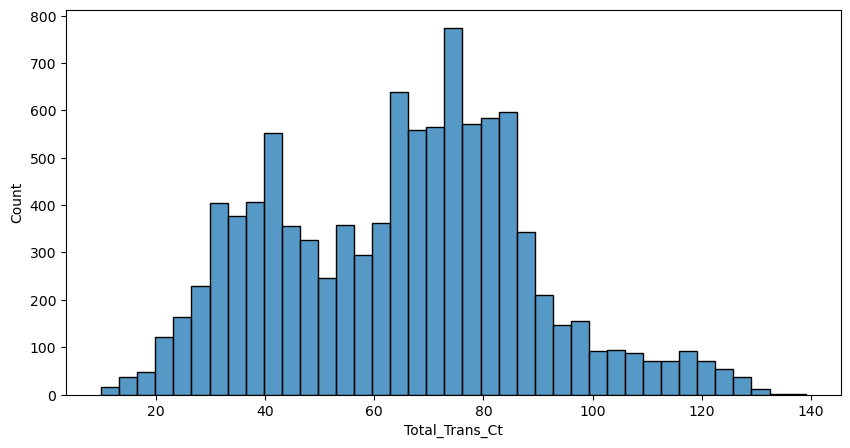

In [38]:
#12)
plt.figure(figsize=(10, 5))
sns.histplot(x=df['Total_Trans_Ct'])

In [39]:
#Inference: An average customer performs 64 transactions a year, a large number of customers also performs about 80 transactions.

### Graph 7 : Scatter plot

<Axes: xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

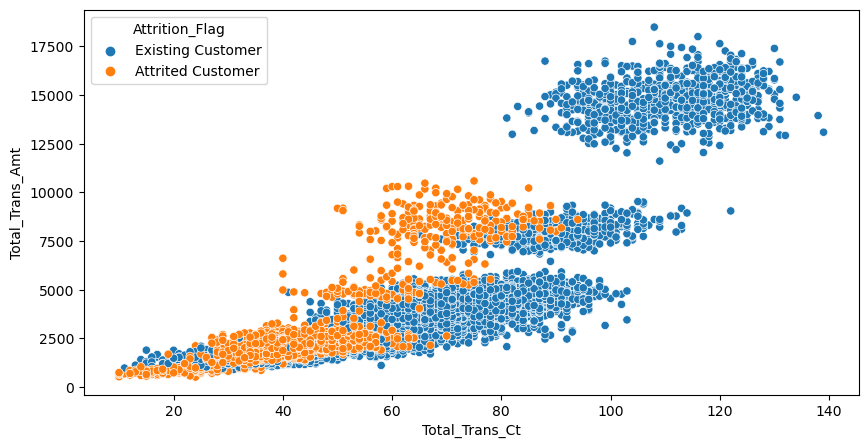

In [40]:
#13)
plt.figure(figsize=(10, 5))
sns.scatterplot(y=df['Total_Trans_Amt'], hue=df['Attrition_Flag'], x=df['Total_Trans_Ct'] )

In [41]:
#Inference: The scatter plot shows a positive correlation between the number of transactions a customer has made and the total amount of money they have spent, with existing customers spending more money than attrited customers.

In [42]:
#14)
sns.scatterplot(x=df['Total_Trans_Ct'],y=df['Total_Trans_Amt'])

<Axes: xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

In [43]:
#Inference:Here, We can note Positive correlation from above figure.
#The higher transaction count, the higher transaction amount.

### Graph 8 : Barplot

Text(0.5, 1.0, 'Credit limit')

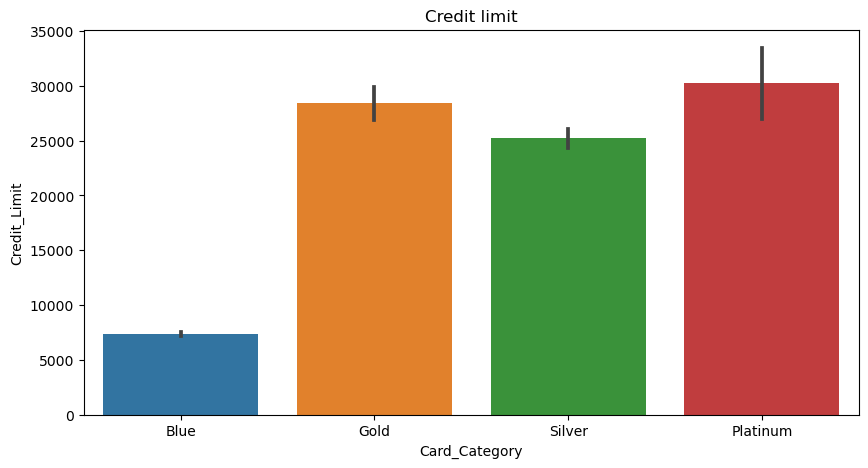

In [44]:
#15)
plt.figure(figsize=(10, 5))
sns.barplot(y=df['Credit_Limit'], x=df['Card_Category'])
plt.title("Credit limit")

In [45]:
#Inference: Platinum and Gold card holders, have access to the highest credit limits.

### Graph 9 : Boxplot

In [46]:
#16)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Card_Category'], y=df['Total_Trans_Ct'])
plt.title('Transaction count by card category')

Text(0.5, 1.0, 'Transaction count by card category')

In [47]:
#Inference: Platinum card holders performs the highest number of transactions, this is as expected, seeing that they have the highest spending ability and credit limit.

### Graph 10 : Heatmap

In [48]:
#17)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, fmt='.2f', cmap='coolwarm')

<Axes: >

In [49]:
#18)
fig = px.imshow(df.corr())
fig.show()

In [50]:
#Inference:1) Upon heatmap plot result, we can say that the high postive correlation is between customer age vs Month on book, Credit limit Vs Open to buy and avg_utilization Vs Total Revolving

# 2) However, very low correlation is observed between: 1) Credit limit and Avg_utilization 2) Total relationship count and Total Trance balance

## 6.Checking Normality

In [51]:
numerical_column = pd.DataFrame(df[['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])


In [52]:
#replacing 0 with median values
median = df['Total_Revolving_Bal'].median()

In [53]:
df['Total_Revolving_Bal'].replace(0,median,inplace = True)

In [54]:
# check skewness of distribution
print(numerical_column.skew())

Customer_Age            -0.033605
Months_on_book          -0.106565
Credit_Limit             1.666726
Total_Revolving_Bal     -0.148837
Avg_Open_To_Buy          1.661697
Total_Amt_Chng_Q4_Q1     1.732063
Total_Trans_Amt          2.041003
Total_Trans_Ct           0.153673
Total_Ct_Chng_Q4_Q1      2.064031
Avg_Utilization_Ratio    0.718008
dtype: float64


In [55]:
#Inference: From the above we can see that Credit_Limit, Avg_Open_To_Buy ,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,
#Avg_Utilization_Ratio have skewness greater tham 0.5 and -0.5.

## 7.Applying Transformation Technique

In [56]:
from sklearn.preprocessing import PowerTransformer


# Select numerical columns for transformation
numerical_columns = ['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal',
                     'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Perform power transformation
pt = PowerTransformer(method='yeo-johnson',standardize = True)
df[numerical_columns] = pt.fit_transform(df[numerical_columns])


In [57]:
print(df[numerical_columns].skew())

Customer_Age            -0.018276
Credit_Limit             0.102988
Total_Revolving_Bal      0.018788
Avg_Open_To_Buy         -0.008893
Total_Amt_Chng_Q4_Q1    -0.088251
Total_Trans_Amt          0.002937
Total_Trans_Ct          -0.059612
Total_Ct_Chng_Q4_Q1     -0.067875
Avg_Utilization_Ratio    0.196942
dtype: float64


In [58]:
#Inference: From the above we can see that all the columns follow normal distribution

## 8.Treating of Outliers

In [59]:
import numpy as np

# Define outlier threshold multiplier (consider 1.5 for standard definition)
outlier_multiplier = 1.5

for column in numerical_column:
    # Calculate quartiles
    q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr

    # Winsorization - Replace outliers with values at the specified quantiles
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    # Print information about outliers
    print(f"Column: {column}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Save the modified dataset (if applicable)
# df.to_csv("modified_dataset.csv", index=False)


Column: Customer_Age
IQR: 1.3729946657482932
Lower bound: -2.7258495103924423
Upper bound: 2.7661291526007306
------------------------------
Column: Months_on_book
IQR: 9.0
Lower bound: 17.5
Upper bound: 53.5
------------------------------
Column: Credit_Limit
IQR: 1.642024434066796
Lower bound: -3.2631614211651945
Upper bound: 3.3049363151019895
------------------------------
Column: Total_Revolving_Bal
IQR: 1.0429001303216063
Lower bound: -1.938259517247759
Upper bound: 2.2333410040386665
------------------------------
Column: Avg_Open_To_Buy
IQR: 1.534641268280572
Lower bound: -3.0561453652585184
Upper bound: 3.082419707863769
------------------------------
Column: Total_Amt_Chng_Q4_Q1
IQR: 1.133729559632399
Lower bound: -2.262246455440304
Upper bound: 2.272671783089293
------------------------------
Column: Total_Trans_Amt
IQR: 1.2281540508059412
Lower bound: -2.5748197837109665
Upper bound: 2.3377964195127983
------------------------------
Column: Total_Trans_Ct
IQR: 1.53163477136

In [60]:
#Treating of Outliers
# Define outlier threshold multiplier (consider 1.5 for standard definition)
outlier_multiplier = 1.5

for column in numerical_column:
    # Calculate quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # Calculate interquartile range (IQR)
    iqr = q3 - q1

    # Define lower and upper bounds
    lower_bound = q1 - outlier_multiplier * iqr
    upper_bound = q3 + outlier_multiplier * iqr

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Choose your preferred treatment method:

    # Option 1: Remove outliers (caution advised)
    # df = df.drop(outliers.index)

    # Option 2: Cap outliers to bounds
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

    # Option 3: Replace outliers with median/mean (consider carefully)
    df.loc[df[column] < lower_bound, column] = df[column].median()
    df.loc[df[column] > upper_bound, column] = df[column].median()

    # Print information about outliers
    print(f"Column: {column}")
    print(f"Number of outliers detected: {len(outliers)}")
    print(f"IQR: {iqr}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print("-" * 30)

# Save the modified dataset (if applicable)
# df.to_csv("modified_dataset.csv", index=False)

Column: Customer_Age
Number of outliers detected: 0
IQR: 1.3729946657482932
Lower bound: -2.7258495103924423
Upper bound: 2.7661291526007306
------------------------------
Column: Months_on_book
Number of outliers detected: 0
IQR: 9.0
Lower bound: 17.5
Upper bound: 53.5
------------------------------
Column: Credit_Limit
Number of outliers detected: 0
IQR: 1.642024434066796
Lower bound: -3.2631614211651945
Upper bound: 3.3049363151019895
------------------------------
Column: Total_Revolving_Bal
Number of outliers detected: 0
IQR: 1.0429001303216063
Lower bound: -1.938259517247759
Upper bound: 2.2333410040386665
------------------------------
Column: Avg_Open_To_Buy
Number of outliers detected: 0
IQR: 1.534641268280572
Lower bound: -3.0561453652585184
Upper bound: 3.082419707863769
------------------------------
Column: Total_Amt_Chng_Q4_Q1
Number of outliers detected: 0
IQR: 1.133729559632399
Lower bound: -2.262246455440304
Upper bound: 2.272671783089293
------------------------------

In [61]:
#Inference: So after treating of outliers we can see that there are no outliers present in the data

## Analyze the relationship between customer demographics, financial attributes, and product usage patterns

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data =df

# Count of customers by gender
print(data['Gender'].value_counts())

# Count of customers by education level
print(data['Education_Level'].value_counts())

# Relationship between age and income category
age_income = pd.crosstab(data['Customer_Age'], data['Income_Category'])
print(age_income)

# Relationship between marital status and credit limit
marital_credit = pd.crosstab(data['Marital_Status'], pd.cut(data['Credit_Limit'], bins=[0, 5000, 10000, 15000, 20000, 35000]))
print(marital_credit)

# Average total transaction amount by card category
avg_trans_amt = data.groupby('Card_Category')['Total_Trans_Amt'].mean()
print(avg_trans_amt)


F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Customer_Age                                                       
-2.517846              1           22            4             0   
-2.395338              1            6            3             1   
-2.272679              0            3            1             0   
-2.149876              1           12            8             5   
-2.026931              2            6           12             3   
-1.903851              0           19            6             8   
-1.780639              4           26           16             8   
-1.657298              9           26           16            19   
-1.533833             10           30           20            19   
-1.410247      

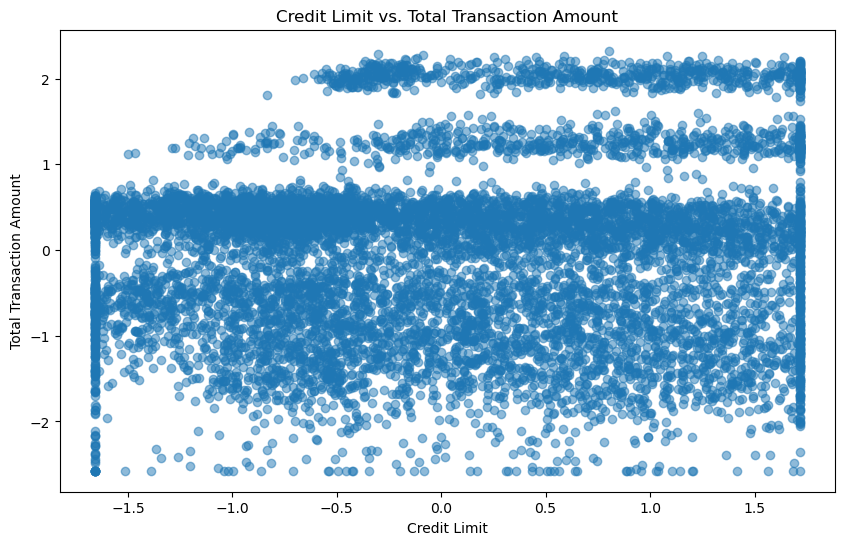

In [63]:
# Plot total transaction amount against credit limit
plt.figure(figsize=(10, 6))
plt.scatter(data['Credit_Limit'], data['Total_Trans_Amt'], alpha=0.5)
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.title('Credit Limit vs. Total Transaction Amount')
plt.show()

## Evaluate the effectiveness of marketing campaigns and identify opportunities for targeted customer retention strategies.

In [64]:
data = df
# Calculate the overall attrition rate
overall_attrition_rate = data['Attrition_Flag'].mean()
print(f"Overall attrition rate: {overall_attrition_rate * 100:.2f}%")

# Analyze attrition rates by different customer segments
segment_cols = ['Customer_Age', 'Gender', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_on_book']
for col in segment_cols:
    print(f"\nAttrition rate by {col}:")
    print(data.groupby(col)['Attrition_Flag'].mean().reset_index().sort_values('Attrition_Flag', ascending=False))

# Identify the most important features for attrition
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(['Attrition_Flag'], axis=1)
y = data['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print(f"\nFeature importances for attrition:")
for feature, importance in zip(X.columns, rf.feature_importances_):
    print(f"{feature}: {importance:.3f}")


TypeError: Could not convert Existing CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerExisting CustomerExisting CustomerExisting CustomerAttrited CustomerAttrited CustomerAttrited CustomerAttrited Customer to numeric

## 9.Encoding 

In [88]:
#Encoding:
Gender_mapping = {'M':0,'F':1}
marital_status_mapping = {'Divorced': 0, 'Unknown': 1, 'Single': 2, 'Married': 3}
education_level_mapping = {'Doctorate': 0, 'Post-Graduate': 1, 'College': 2, 'Uneducated':3,'Unknown':4,'High School':5,'Graduate':6}
Attrition_Flag_mapping= {'Attrited Customer': 0,'Existing Customer': 1}
income_category_mapping = {'$120K +': 0, 'Unknown': 1, '$60K - $80K': 2,'$80K - $120K' : 3,'$40K - $60K':4,'Less than $40K' : 5}
card_category_mapping = {'Platinum': 0, 'Gold': 1, 'Silver': 2,'Blue': 3}

# Replace categorical values with numerical values using replace function
df['Gender'] = df['Gender'].replace(Gender_mapping) 
df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)
df['Education_Level'] = df['Education_Level'].replace(education_level_mapping)
df['Attrition_Flag'] = df['Attrition_Flag'].replace(Attrition_Flag_mapping)
df['Income_Category'] = df['Income_Category'].replace(income_category_mapping)
df['Card_Category'] = df['Card_Category'].replace(card_category_mapping)

In [89]:
#Inference :  From the above, we have given correct weightage for the categorical variables.

## 10.Statistical Tests
* Test for Normality (Shapiro)
* one sample t-test
* two sample t-test
* chi-square test 

### i)Test for Normality(Shapiro)

In [90]:
#Shapiro test is mostly useful for sample data than population,so we here take a sample data for checking the p value 
df1 = pd.read_csv("C:/Users/lohithlikith/Documents/Datasets/Credit card churn/Book1.csv")

In [91]:
numerical_column1 = pd.DataFrame(df1[['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']])

In [92]:
#H0 : The data contains normality
#H1 : The data doesnot contain normality

from scipy.stats import shapiro, ttest_1samp, ttest_ind, chi2_contingency
for col in numerical_column1:
    stat, p = shapiro(df1[col])
    print(f'{col}: Stat={stat:.3f}, p={p:.3f}')

Customer_Age: Stat=0.978, p=0.647
Months_on_book: Stat=0.944, p=0.051
Credit_Limit: Stat=0.828, p=0.000
Total_Revolving_Bal: Stat=0.926, p=0.014
Avg_Open_To_Buy: Stat=0.847, p=0.000
Total_Amt_Chng_Q4_Q1: Stat=0.899, p=0.002
Total_Trans_Amt: Stat=0.976, p=0.559
Total_Trans_Ct: Stat=0.942, p=0.044
Total_Ct_Chng_Q4_Q1: Stat=0.876, p=0.000
Avg_Utilization_Ratio: Stat=0.816, p=0.000


In [93]:
#Inference: We can see that Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
#have p value less than 0.05 so we apply power transformation technique for the mentioned columns

In [94]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer


# Select numerical columns for transformation
numerical_columns1 = [ 'Credit_Limit','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
                     'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Perform power transformation
pt = PowerTransformer(method='yeo-johnson',standardize = True)
df1[numerical_columns] = pt.fit_transform(df1[numerical_columns])


In [95]:
#H0 : The data contains normality
#H1 : The data doesnot contain normality

from scipy.stats import shapiro, ttest_1samp, ttest_ind, chi2_contingency
for col in numerical_column:
    stat, p = shapiro(df1[col])
    print(f'{col}: Stat={stat:.3f}, p={p:.3f}')
    

Customer_Age: Stat=0.980, p=0.703
Months_on_book: Stat=0.944, p=0.051
Credit_Limit: Stat=0.961, p=0.198
Total_Revolving_Bal: Stat=0.826, p=0.000
Avg_Open_To_Buy: Stat=0.956, p=0.127
Total_Amt_Chng_Q4_Q1: Stat=0.977, p=0.591
Total_Trans_Amt: Stat=0.984, p=0.845
Total_Trans_Ct: Stat=0.978, p=0.648
Total_Ct_Chng_Q4_Q1: Stat=0.984, p=0.841
Avg_Utilization_Ratio: Stat=0.925, p=0.013


In [96]:
#Inference: From the above we can see that after applying power transformation technique, all the p values of the above mentioned 
#columns is greater than 0.05 so we can say that we cannot reject H0(we accept normality)

In [97]:
#So from the skewness and shapiro test we can see that the above data, we have considered is normal.

### ii) one sample t-test

In [98]:
#1 sample t test is used for testing population mean for a particular value with a column for example if we need to check 
#Null Hypothesis (H0): The average age of customers in the population is equal to a specified value.
#Alternative Hypothesis (H1): The average age of customers in the population is different from the specified value.
# let's assume that the specified value is 50.

In [99]:
import scipy.stats as stats

# Extract the 'Customer_Age' column
customer_age = df1['Customer_Age']

# Specify the null hypothesis value
null_hypothesis_value = 50

# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(customer_age, null_hypothesis_value)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -308.2207001484488
P-value: 3.5084375292763175e-66


In [100]:
#Inference: We donot reject H0 i.e from the above mentioned null hypothesis: The average age of customers in the population is equal to a specified value.

### iii) two sample t-test

In [101]:
# To check the independence between the features

In [102]:
#The Hypothesis is given as follows
#H0 : There is no significant difference between the means of the two groups for each numerical column.
#H1 : There is a significant difference between the means of the two groups for each numerical column.

In [103]:
# List of columns to exclude 
exclude_cols = ['Attrition_Flag', 'Gender', 'Dependent_count','Education_Level','Marital_Status','Income_Category','Card_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']  

# Get numeric columns excluding given columns
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_cols).columns

# Perform t-test on pairs of numeric columns
for i in range(len(num_cols)):
  for j in range(i+1, len(num_cols)):
    col1 = df[num_cols[i]]
    col2 = df[num_cols[j]]
    
    tstat, pval = ttest_ind(col1, col2)
    
    print(f'{num_cols[i]} vs {num_cols[j]}:') 
    print(f'  t-statistic: {tstat:.3f}')
    print(f'  p-value: {pval:.3f}')

    if pval < 0.05:
      print('Columns are dependent (reject H0)')
    else:
      print('Columns are independent (fail to reject H0)')

Customer_Age vs Months_on_book:
  t-statistic: -461.536
  p-value: 0.000
Columns are dependent (reject H0)
Customer_Age vs Credit_Limit:
  t-statistic: -0.006
  p-value: 0.996
Columns are independent (fail to reject H0)
Customer_Age vs Total_Revolving_Bal:
  t-statistic: -0.925
  p-value: 0.355
Columns are independent (fail to reject H0)
Customer_Age vs Avg_Open_To_Buy:
  t-statistic: -0.055
  p-value: 0.956
Columns are independent (fail to reject H0)
Customer_Age vs Total_Amt_Chng_Q4_Q1:
  t-statistic: 0.038
  p-value: 0.970
Columns are independent (fail to reject H0)
Customer_Age vs Total_Trans_Amt:
  t-statistic: -0.086
  p-value: 0.931
Columns are independent (fail to reject H0)
Customer_Age vs Total_Trans_Ct:
  t-statistic: -0.006
  p-value: 0.996
Columns are independent (fail to reject H0)
Customer_Age vs Total_Ct_Chng_Q4_Q1:
  t-statistic: -0.073
  p-value: 0.942
Columns are independent (fail to reject H0)
Customer_Age vs Avg_Utilization_Ratio:
  t-statistic: -0.006
  p-value: 0

In [104]:
#Inference: We cannot reject H0 so we say that the features are independent

### iv)Chi - Square test(for categorical columns)

In [105]:
#Chi-Square test is done for categorical columns to check the independence of categorical columns

In [106]:
#The hypotheses for the above is given as follows
#H0: There is no significant association between the two categorical variables.
#H1: There is a significant association between the two categorical variables.

In [107]:
from scipy.stats import chi2_contingency
# Perform the chi-square test for each pair of categorical columns
for col1 in object_column_names:
    for col2 in object_column_names:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            print(f'Chi-square test between {col1} and {col2}: p-value = {p}')

Chi-square test between Attrition_Flag and Gender: p-value = 0.00019635846717310269
Chi-square test between Attrition_Flag and Education_Level: p-value = 0.05148913147336628
Chi-square test between Attrition_Flag and Marital_Status: p-value = 0.10891263394840227
Chi-square test between Attrition_Flag and Income_Category: p-value = 0.025002425704390614
Chi-square test between Attrition_Flag and Card_Category: p-value = 0.5252382797994759
Chi-square test between Gender and Attrition_Flag: p-value = 0.00019635846717310269
Chi-square test between Gender and Education_Level: p-value = 0.2949785406213699
Chi-square test between Gender and Marital_Status: p-value = 0.27523828441500264
Chi-square test between Gender and Income_Category: p-value = 0.0
Chi-square test between Gender and Card_Category: p-value = 3.604857850219599e-16
Chi-square test between Education_Level and Attrition_Flag: p-value = 0.05148913147336627
Chi-square test between Education_Level and Gender: p-value = 0.29497854062

In [108]:
#Inference: We can see from the above that almost all the chi square test between the features are greater than 0.05(we donot reject H0)
#We can also see that some of them have a significant association between them.

## Develop Models

### Linear Regression

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Select the relevant columns for the model
X = df.drop('Customer_Age',axis = 1)
y = df['Customer_Age']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [119]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("r2_score:", r2)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

r2_score: 0.6025094751241011
Mean Squared Error: 0.394647273904281
R-squared: 0.6025094751241011


In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Select the relevant columns for the models
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_cm = confusion_matrix(y_test, logistic_predictions)
logistic_report = classification_report(y_test, logistic_predictions)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_cm = confusion_matrix(y_test, tree_predictions)
tree_report = classification_report(y_test, tree_predictions)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)



In [126]:
# Print the confusion matrices and classification reports
print("Logistic Regression Confusion Matrix:")
print(logistic_cm)
print("Logistic Regression Classification Report:")
print(logistic_report)


Logistic Regression Confusion Matrix:
[[ 199  128]
 [  57 1642]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       327
           1       0.93      0.97      0.95      1699

    accuracy                           0.91      2026
   macro avg       0.85      0.79      0.81      2026
weighted avg       0.90      0.91      0.90      2026



In [127]:
print("Decision Tree Confusion Matrix:")
print(tree_cm)
print("Decision Tree Classification Report:")
print(tree_report)


Decision Tree Confusion Matrix:
[[ 256   71]
 [  66 1633]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       327
           1       0.96      0.96      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



In [128]:
print("KNN Confusion Matrix:")
print(knn_cm)
print("KNN Classification Report:")
print(knn_report)


KNN Confusion Matrix:
[[ 119  208]
 [  35 1664]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.36      0.49       327
           1       0.89      0.98      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.83      0.67      0.71      2026
weighted avg       0.87      0.88      0.86      2026



In [129]:
print("Random Forest Confusion Matrix:")
print(rf_cm)
print("Random Forest Classification Report:")
print(rf_report)

Random Forest Confusion Matrix:
[[ 265   62]
 [  22 1677]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



## K means Clustering

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
X = data[['Customer_Age', 'Total_Trans_Amt']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to the data points
labels = kmeans.labels_

# Add the cluster labels to the dataset
data['Cluster'] = labels

# Plot the K-means clusters
plt.scatter(X['Customer_Age'], X['Total_Trans_Amt'], c=labels)
plt.xlabel('Customer Age')
plt.ylabel('Total Transaction Amount')
plt.title('K-means Clustering')
plt.show()